# Task4

In [16]:
import numpy as np
import scipy.integrate as scp
from sympy import symbols
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

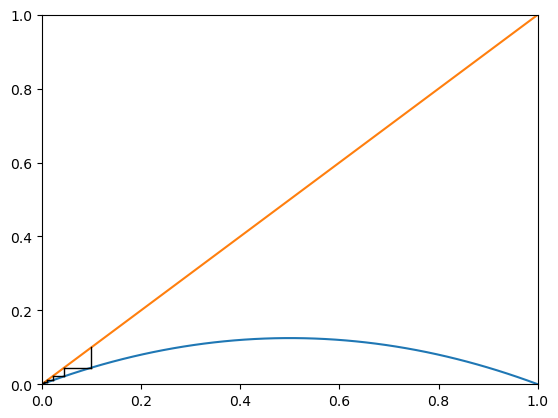

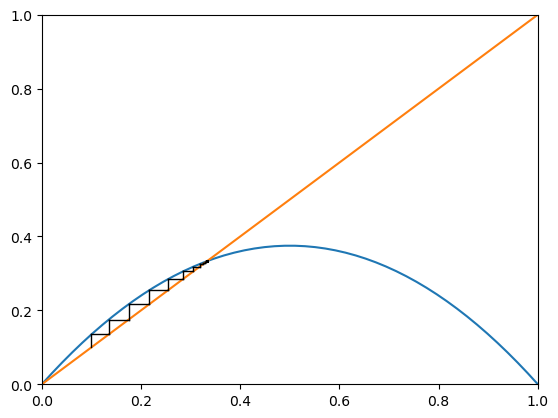

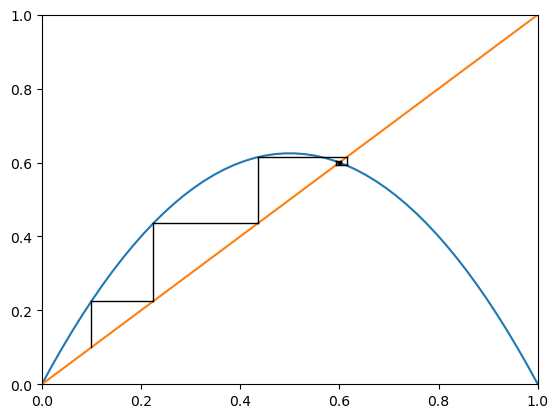

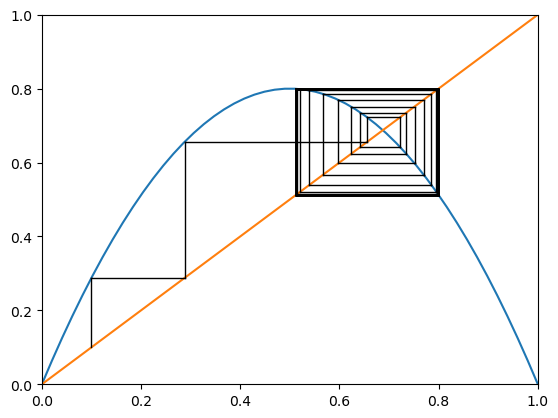

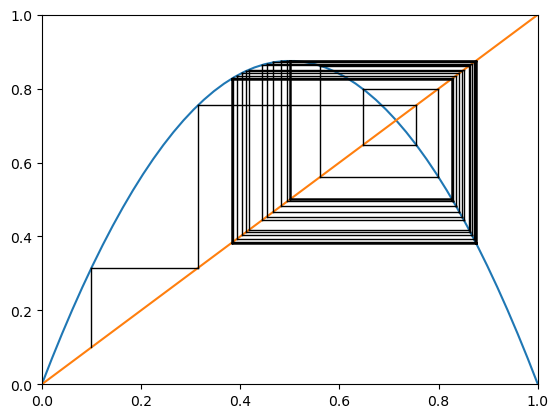

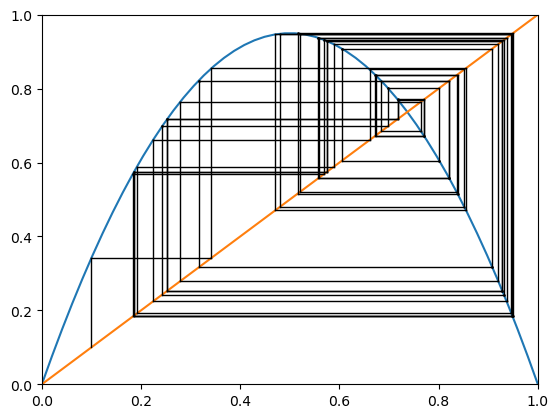

In [5]:
for r in [0.5, 1.5, 2.5, 3.2,3.5, 3.8]:  
    
    t = np.linspace(0, 1)
    plt.plot(t, r * t * (1 - t))
    plt.plot([0, 1], [0, 1])
    
    x = x0 = 0.1
    for i in range(50):
        y = r * x * (1 - x)
        plt.plot([x, x], [x, y], 'k', lw=1)
        plt.plot([x, y], [y, y], 'k', lw=1)
        plt.plot([x], [y], 'ok', ms=1, alpha=(i + 1) / 50)
        x = y
        
        
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

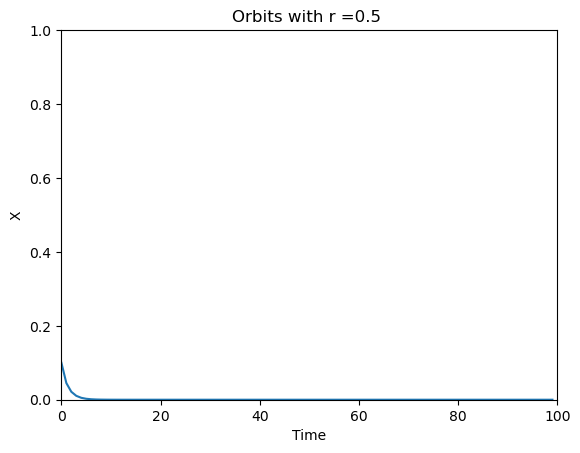

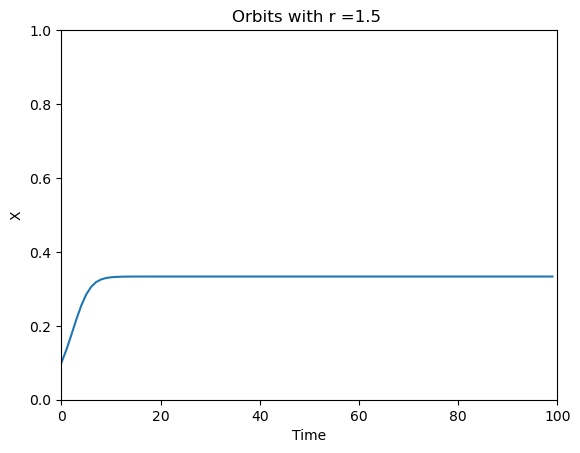

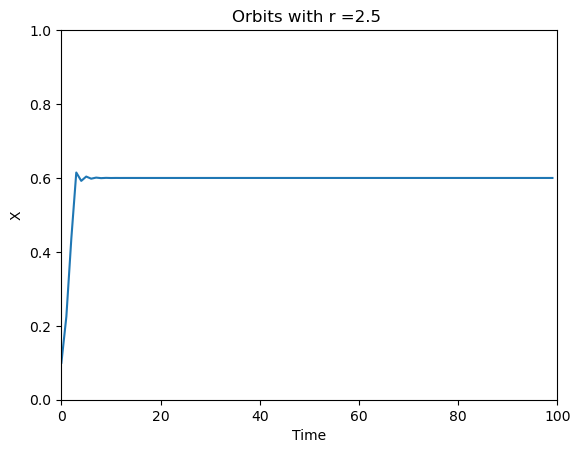

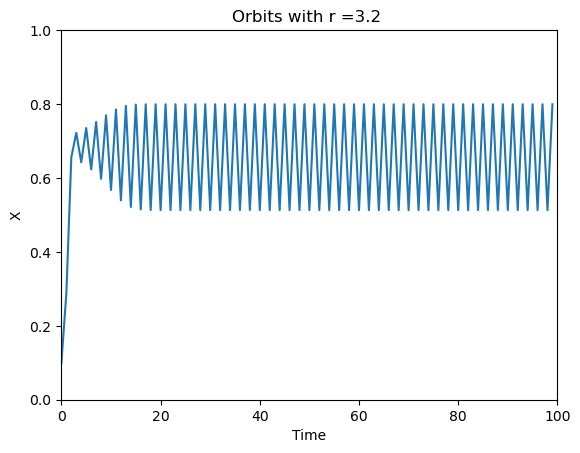

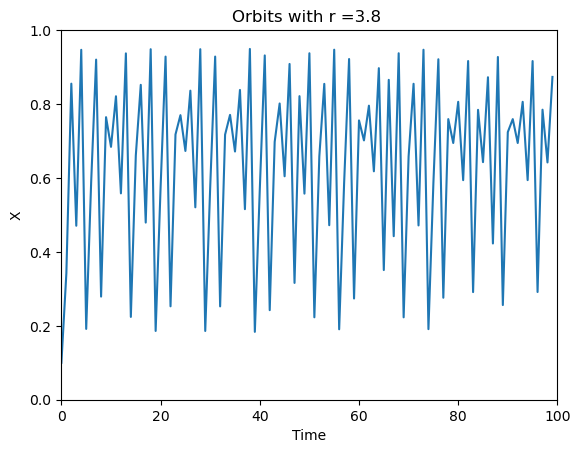

In [30]:
def logistic_equation_orbit(x0, r, iteration, ax=None):
    X = []
    T = []
    t = 0
    x = x0
    
    for i in range(iteration):
        X.append(x)
        T.append(t)
        t+=1
        x = r * x * (1 - x);
    return T,X

for r in [0.5, 1.5, 2.5, 3.2, 3.8]: 
    fig, ax = plt.subplots(1, 1)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 100)
    ax.set_xlabel('Time')
    ax.set_ylabel('X')
    ax.set_title(f"Orbits with r =%.1f "%r)
    T,X=logistic_equation_orbit(0.1, r, 100)
    plt.plot(T, X)

1.007
2.999
3.449
3.544


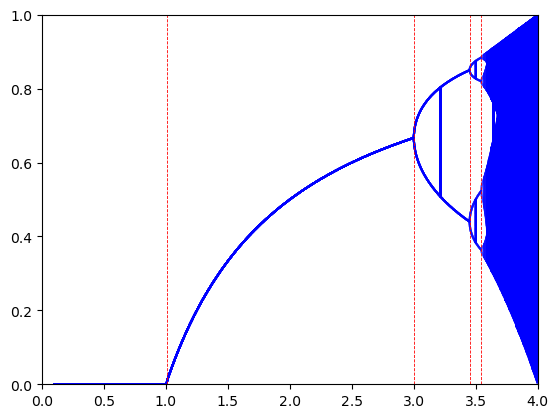

In [7]:
n = 10000
r = np.linspace(0.1, 4.0, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)
fig, ax1 = plt.subplots(1, 1)
plt.subplots_adjust(hspace=0.4)

X = []

for i in range(iterations):
    x = r * x * (1 - x)
    lyapunov += np.log(abs(r - 2 * r * x))
    if i >= (iterations - last):
        ax1.plot(r, x, alpha=.1,color='b')
        
ax1.set_xlim(0, 4)
ax1.set_ylim(0, 1)
bifurcations = []
bifurcations_point = []

sign = 0
for i in range (0, lyapunov.size):
    temp = sign
    if(lyapunov[i]<0):
        sign = -1
    elif(lyapunov[i]>0):
        sign = +1
    if(temp != sign and temp != 0):
        bifurcations.append(r[i])
        
for i in range(0, 8, 2):
    bifurcations_point.append((bifurcations[i] + bifurcations[i+1])/2)
    
for i in range(len(bifurcations_point)):
    print(f"{bifurcations_point[i]:.3f}")
    ax1.axvline(x=[bifurcations_point[i]], ls='--', lw=0.6, color='r')

/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  del sys.path[0]
/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
/opt/anaconda3/envs/python37/lib/pytho

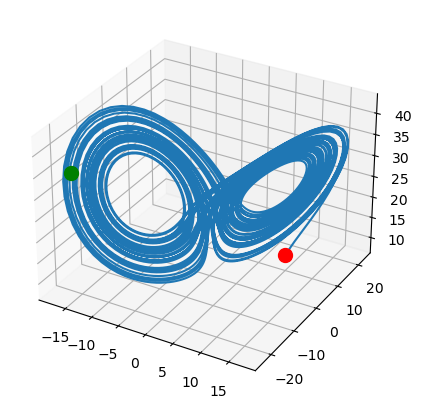

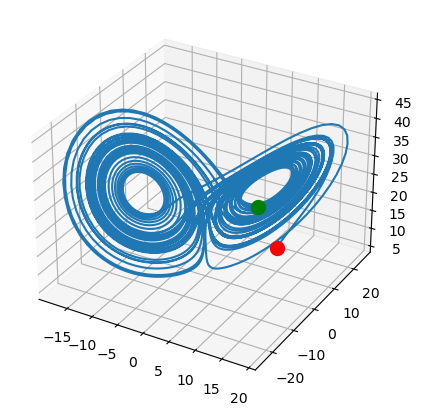

In [86]:
rho = 28.0 
sigma = 10.0
beta = 2.67

def f(state, t):
    x, y, z = state 
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  

state1 = [10.0, 10.0, 10.0]
states1 = odeint(f, state1, t)

fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.gca(projection="3d")
ax1.plot(states1[0:5000, 0], states1[0:5000, 1], states1[0:5000, 2])

state2 = [10+1e-8, 10.0, 10.0]
states2 = odeint(f, state2, t)

fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.gca(projection="3d")
ax2.plot(states2[0:5000, 0], states2[0:5000, 1], states2[0:5000, 2])

ax1.plot([state1[0]], [state1[1]], [state1[2]], 'ok', ms=10, color='r', alpha=1)
ax1.plot([states1[int(states.size/3 - 1)][0]],  
        [states1[int(states.size/3 - 1)][1]], 
        [states1[int(states.size/3 - 1)][2]],'ok', ms=10, color='g', alpha=1)

ax2.plot([state2[0]], [state2[1]], [state2[2]], 'ok', ms=10, color='r', alpha=1)
ax2.plot([states2[int(states.size/3 - 1)][0]],  
        [states2[int(states.size/3 - 1)][1]], 
        [states2[int(states.size/3 - 1)][2]],'ok', ms=10, color='g', alpha=1)


plt.draw()
plt.show()